In [ ]:
%pip install python-binance

In [ ]:
%pip install matplotlib

In [ ]:
%pip install pandas

In [ ]:
import requests
import pandas as pd
from datetime import datetime
from pathlib import Path

# Base URL for Binance API
base_url = 'https://binance.com'

# Symbol to fetch
symbol = 'BTCUSDT'

# Function to convert datetime to timestamp in milliseconds
def timestamp_to_int(dt):
    return int(datetime.timestamp(dt) * 1000)

# Start and end time for data fetching
start_time = timestamp_to_int(datetime(2020, 1, 1))
end_time = timestamp_to_int(datetime(2023, 12, 13))

# Function to get funding rate and append to DataFrame
def get_funding_rate(df, start_time):
    endpoint = '/fapi/v1/fundingRate'
    params = {
        'symbol': symbol,
        'startTime': start_time,
        'endTime': end_time,
        'limit': 100  # Adjust as per API limits
    }
    url = base_url + endpoint
    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()
        for funding_rate in data:
            rate = funding_rate['fundingRate']
            time = datetime.fromtimestamp(funding_rate['fundingTime'] / 1000).strftime('%Y-%m-%d %H:%M:%S')
            row = pd.Series({'symbol': symbol, 'rate': rate, 'time': time})
            df = pd.concat([df, row.to_frame().T], ignore_index=True)
            print(f'Symbol: {symbol}, Rate: {rate}, Time: {time}')
        # Update start_time to the last fetched time plus one millisecond
        if data:
            last_time = data[-1]['fundingTime'] + 1
        else:
            last_time = start_time
    else:
        print(f'Error: {response.status_code}')
        last_time = start_time
    return df, last_time

# Initialize DataFrame
df = pd.DataFrame()

# Fetch data in loop
while start_time < end_time:
    df, start_time = get_funding_rate(df, start_time)

# Print or process the DataFrame as needed
print(df)

# Save to CSV
filepath = Path('C:/Quant/BTCfunding_rate.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(filepath)

In [25]:
import requests
import pandas as pd
from datetime import datetime, timedelta
from pathlib import Path

# Base URL for Binance API
base_url = 'https://api.binance.com'

# Symbol to fetch
symbol = 'BTCUSDT'

# Function to convert datetime to timestamp in milliseconds
def timestamp_to_int(dt):
    return int(datetime.timestamp(dt) * 1000)

# Start and end time for data fetching
start_time = timestamp_to_int(datetime(2020, 1, 1))
end_time = timestamp_to_int(datetime(2023, 12, 13))

# Function to get historical klines and append to DataFrame
def get_historical_klines(df, start_time):
    endpoint = '/api/v3/klines'
    interval = '8h'
    params = {
        'symbol': symbol,
        'interval': interval,
        'startTime': start_time,
        'endTime': start_time + 8 * 60 * 60 * 1000,  # 8 hours in milliseconds
        'limit': 1000
    }
    url = base_url + endpoint
    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()
        klines_df = pd.DataFrame(data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])
        klines_df['timestamp'] = pd.to_datetime(klines_df['timestamp'], unit='ms')
        df = pd.concat([df, klines_df], ignore_index=True)
        print(f'Symbol: {symbol}, Fetched {len(klines_df)} klines from {klines_df["timestamp"].min()} to {klines_df["timestamp"].max()}')
    else:
        print(f'Error: {response.status_code}')

    return df

# Initialize DataFrame
df = pd.DataFrame()

# Fetch data in loop
while start_time < end_time:
    df = get_historical_klines(df, start_time)
    start_time += 8 * 60 * 60 * 1000  # Move to next 8-hour interval

# Print or process the DataFrame as needed
print(df)

# Save to CSV
filepath = Path('C:/Quant/BTC8_price.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(filepath)


Symbol: BTCUSDT, Fetched 2 klines from 2019-12-31 16:00:00 to 2020-01-01 00:00:00
Symbol: BTCUSDT, Fetched 2 klines from 2020-01-01 00:00:00 to 2020-01-01 08:00:00
Symbol: BTCUSDT, Fetched 2 klines from 2020-01-01 08:00:00 to 2020-01-01 16:00:00
Symbol: BTCUSDT, Fetched 2 klines from 2020-01-01 16:00:00 to 2020-01-02 00:00:00
Symbol: BTCUSDT, Fetched 2 klines from 2020-01-02 00:00:00 to 2020-01-02 08:00:00
Symbol: BTCUSDT, Fetched 2 klines from 2020-01-02 08:00:00 to 2020-01-02 16:00:00
Symbol: BTCUSDT, Fetched 2 klines from 2020-01-02 16:00:00 to 2020-01-03 00:00:00
Symbol: BTCUSDT, Fetched 2 klines from 2020-01-03 00:00:00 to 2020-01-03 08:00:00
Symbol: BTCUSDT, Fetched 2 klines from 2020-01-03 08:00:00 to 2020-01-03 16:00:00
Symbol: BTCUSDT, Fetched 2 klines from 2020-01-03 16:00:00 to 2020-01-04 00:00:00
Symbol: BTCUSDT, Fetched 2 klines from 2020-01-04 00:00:00 to 2020-01-04 08:00:00
Symbol: BTCUSDT, Fetched 2 klines from 2020-01-04 08:00:00 to 2020-01-04 16:00:00
Symbol: BTCUSDT,

In [1]:
import requests
import pandas as pd
from datetime import datetime, timedelta
from pathlib import Path

# Base URL for Binance API
base_url = 'https://api.binance.com'

# Symbol to fetch
symbol = 'BTCUSDT'

# Function to convert datetime to timestamp in milliseconds
def timestamp_to_int(dt):
    return int(datetime.timestamp(dt) * 1000)

# Start and end time for data fetching
start_time = timestamp_to_int(datetime(2020, 1, 1))
end_time = timestamp_to_int(datetime(2023, 12, 13))

# Function to get historical klines and append to DataFrame
def get_historical_klines(df, start_time):
    endpoint = '/api/v1/klines'
    interval = '8h'
    params = {
        'symbol': symbol,
        'interval': interval,
        'startTime': start_time,
        'endTime': start_time + 8 * 60 * 60 * 1000,  # 8 hours in milliseconds
        'limit': 1000
    }
    url = base_url + endpoint
    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()
        klines_df = pd.DataFrame(data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])
        klines_df['timestamp'] = pd.to_datetime(klines_df['timestamp'], unit='ms')
        df = pd.concat([df, klines_df], ignore_index=True)
        print(f'Symbol: {symbol}, Fetched {len(klines_df)} klines from {klines_df["timestamp"].min()} to {klines_df["timestamp"].max()}')
    else:
        print(f'Error: {response.status_code}')

    return df

# Initialize DataFrame
df = pd.DataFrame()

# Fetch data in loop
while start_time < end_time:
    df = get_historical_klines(df, start_time)
    start_time += 8 * 60 * 60 * 1000  # Move to next 8-hour interval

# Print or process the DataFrame as needed
print(df)

# Save to CSV
filepath = Path('C:/Quant/BTC8C_price.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(filepath)

Symbol: BTCUSDT, Fetched 2 klines from 2019-12-31 16:00:00 to 2020-01-01 00:00:00
Symbol: BTCUSDT, Fetched 2 klines from 2020-01-01 00:00:00 to 2020-01-01 08:00:00
Symbol: BTCUSDT, Fetched 2 klines from 2020-01-01 08:00:00 to 2020-01-01 16:00:00
Symbol: BTCUSDT, Fetched 2 klines from 2020-01-01 16:00:00 to 2020-01-02 00:00:00
Symbol: BTCUSDT, Fetched 2 klines from 2020-01-02 00:00:00 to 2020-01-02 08:00:00
Symbol: BTCUSDT, Fetched 2 klines from 2020-01-02 08:00:00 to 2020-01-02 16:00:00
Symbol: BTCUSDT, Fetched 2 klines from 2020-01-02 16:00:00 to 2020-01-03 00:00:00
Symbol: BTCUSDT, Fetched 2 klines from 2020-01-03 00:00:00 to 2020-01-03 08:00:00
Symbol: BTCUSDT, Fetched 2 klines from 2020-01-03 08:00:00 to 2020-01-03 16:00:00
Symbol: BTCUSDT, Fetched 2 klines from 2020-01-03 16:00:00 to 2020-01-04 00:00:00
Symbol: BTCUSDT, Fetched 2 klines from 2020-01-04 00:00:00 to 2020-01-04 08:00:00
Symbol: BTCUSDT, Fetched 2 klines from 2020-01-04 08:00:00 to 2020-01-04 16:00:00
Symbol: BTCUSDT,

In [19]:
import pandas as pd

# 指定你的 CSV 檔案路徑
csv_file_path = 'BTCfunding_rate.csv'

# 讀取 CSV 檔案
df = pd.read_csv(csv_file_path)

# 顯示 DataFrame 的前幾行
print(df.head())

   Unnamed: 0   symbol      rate                 time
0           0  BTCUSDT -0.000024  2020-01-01 00:00:00
1           1  BTCUSDT -0.000124  2020-01-01 08:00:00
2           2  BTCUSDT -0.000124  2020-01-01 16:00:00
3           3  BTCUSDT -0.000097  2020-01-02 00:00:00
4           4  BTCUSDT  0.000037  2020-01-02 08:00:00


Year 2020 - Positive Ratio: 85.61%
Year 2021 - Positive Ratio: 92.69%
Year 2022 - Positive Ratio: 77.90%
Year 2023 - Positive Ratio: 89.32%


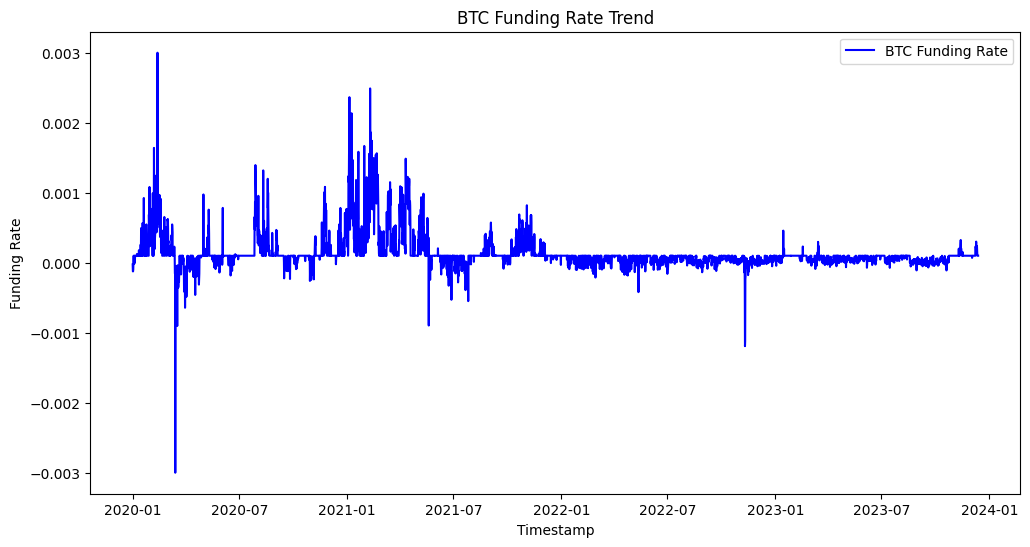

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# 假設你上傳的檔案名稱為 "BTCfunding_rate.csv"
file_name = "BTCfunding_rate.csv"

# 讀取 CSV 檔案
df = pd.read_csv(file_name)

# 將 'time' 轉換為 datetime 格式
df['time'] = pd.to_datetime(df['time'])

# 新增一列 'positive'，資金費率為正時為True，否則為False
df['positive'] = df['rate'] > 0

# 按年份分組，計算每年資金費率為正和負的比例
yearly_ratios = df.groupby(df['time'].dt.year)['positive'].mean()

# 繪製走勢圖
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df['time'], df['rate'], label='BTC Funding Rate', color='blue')

ax.set_title('BTC Funding Rate Trend')
ax.set_xlabel('Timestamp')
ax.set_ylabel('Funding Rate')
ax.legend()

# 顯示每年的資金費率為正和負的比例
for year, ratio in yearly_ratios.items():
    print(f'Year {year} - Positive Ratio: {ratio:.2%}')

plt.show()


Average Negative Duration: 18.028169014084508 hours
Average Positive Duration: 105.39622641509433 hours


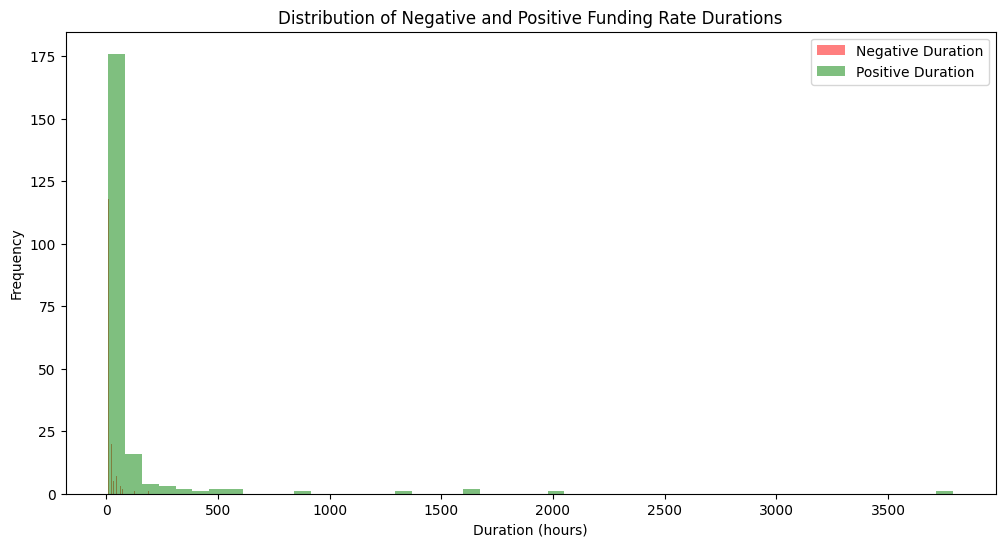

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# 讀取 CSV 檔案
df = pd.read_csv('BTCfunding_rate.csv')
df['time'] = pd.to_datetime(df['time'])

# 設定 starttime 和 endtime
starttime = datetime(2020, 1, 1)
endtime = datetime(2023, 1, 1)

negative_periods = []  
positive_periods = []  
current_negative_start = None  
current_positive_start = None  

for index, row in df.iterrows():
    if starttime <= row['time'] <= endtime:
        if row['rate'] < 0:
            if current_negative_start is None:
                current_negative_start = row['time']
            if current_positive_start is not None:
                positive_duration = row['time'] - current_positive_start
                positive_periods.append(positive_duration.total_seconds() / 3600)  
                current_positive_start = None 
        else:
            if current_positive_start is None:
                current_positive_start = row['time']
            if current_negative_start is not None:
                negative_duration = row['time'] - current_negative_start
                negative_periods.append(negative_duration.total_seconds() / 3600)
                current_negative_start = None  
# 計算平均時間
average_negative_duration = sum(negative_periods) / len(negative_periods) if negative_periods else 0
average_positive_duration = sum(positive_periods) / len(positive_periods) if positive_periods else 0
print(f"Average Negative Duration: {average_negative_duration} hours")
print(f"Average Positive Duration: {average_positive_duration} hours")

# 绘制持续时间分布的直方图
plt.figure(figsize=(12, 6))
plt.hist(negative_periods, bins=50, alpha=0.5, label='Negative Duration', color='red')
plt.hist(positive_periods, bins=50, alpha=0.5, label='Positive Duration', color='green')

plt.title('Distribution of Negative and Positive Funding Rate Durations')
plt.xlabel('Duration (hours)')
plt.ylabel('Frequency')
plt.legend()
plt.show()



In [48]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# Binance API基礎URL和交易對
base_url = 'https://binance.com'
symbol = "BTCUSDT"



# 獲取歷史期貨價格
def get_historical_futures_klines(interval, start_time, end_time):
    endpoint = '/fapi/v1/klines'
    params = {
        'symbol': symbol,
        'interval': interval,
        'startTime': int(start_time.timestamp() * 1000),
        'endTime': int(end_time.timestamp() * 1000),
        'limit': 1000
    }
    url = base_url + endpoint
    response = requests.get(url, params=params)
    data = response.json()

    # DataFrame
    df = pd.DataFrame(data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    return df

# 獲取fundingrate
def get_funding_rate(start_time, end_time):
    file_name = "BTCfunding_rate.csv"

    # 讀取 CSV 檔案
    df = pd.read_csv(file_name)
    df['time'] = pd.to_datetime(df['time'])

    # 篩選出在指定時間區間的資料
    filtered_df = df[(df['time'] >= start_time) & (df['time'] < end_time)]

    return filtered_df

# 獲取現貨價格
def get_historical_klines(start_time, end_time):
    file_name = "BTC8S_price.csv"

    # 讀取 CSV 檔案
    df = pd.read_csv(file_name)
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # 篩選出在指定時間區間的資料
    filtered_df = df[(df['timestamp'] >= start_time) & (df['timestamp'] < end_time)]

    return filtered_df

#策略執行
def backtest(start_time, end_time):
    klines_df = get_historical_klines(start_time, end_time)
    funding_rate_df = get_funding_rate(start_time, end_time)
    average_time = 18.028169014084508 # 平均持續時間
    # 初始化資金
    capital = 10000
    spot_position = 0
    futures_short_position = 0
    in_short_trade = False
    in_long_trade = False
    trade_start_time = None
    last_exit_capital = 0
    slippage_cost = 0
    continued_time = 0
    # 假設手續費 我還沒有仔細算
    spot_rate = 0.001
    future_rate = 0.0005
    slippage_rate = 0.001  # 滑點率
    
    for index, row in funding_rate_df.iterrows():
        current_time = row['time']
        funding_rate = row['rate']

        
        corresponding_row = klines_df[klines_df['timestamp'] == current_time]

        if not corresponding_row.empty:
            current_price = corresponding_row['close'].values[0]
            print(f"At {current_time}, funding rate: {funding_rate}, close price: {current_price}")
        else:
            print(f"No corresponding row found for {current_time}")

        #計算資金費率為負的持續時間
        if funding_rate < 0:
           continued_time += 1
        else:
           continued_time = 0
            
        
        if funding_rate > 0 and spot_position == 0:
            # 資金費率為正，買入現貨，做空合約
            in_short_trade = True
            in_price = current_price
            # 考慮手續費
            spot_after_fee = capital/2*(1-spot_rate)
            future_after_fee = capital/2*(1-future_rate)
            spot = spot_after_fee/current_price

            # 更新持倉
            spot_position = spot_after_fee
            futures_short_position = future_after_fee
            capital=0
            capital = futures_short_position + spot_position

            print(f"Buy Spot and Short Futures at {current_time} - Spot Position: {spot_position}, Futures Short Position: {futures_short_position}, Capital: {capital}")
        
        if funding_rate > 0 and in_short_trade != 0:
            spot_position = spot * current_price
            futures_short_position = futures_short_position - (spot * current_price - futures_short_position)
            capital = 0
            capital = spot_position + futures_short_position + futures_short_position * funding_rate/ (365*3)

            print(f"Buy Spot and Short Futures at {current_time} - Spot Position: {spot_position}, Futures Short Position: {futures_short_position}, Capital: {capital}")
        
        
        # 出場策略
        if capital < last_exit_capital:
            # 如果現在的價格小於上一次出場的價格，不出場
            print(f"Not exiting at {current_time} - Current Price: {current_price}, Last Exit Price: {last_exit_capital}")
        else:
            # 出場條件
            if funding_rate <= 0 and in_short_trade:
                spot_position = float(spot_position) * (current_price / in_price )
                futures_short_position = float(futures_short_position) * ( in_price / current_price)
                # 資金費率為負，停止交易
                in_short_trade = False
                spot_position = 0
                futures_short_position = 0
                capital += futures_short_position * (1 + funding_rate - future_rate) + spot_position * (1 - spot_rate) - slippage_cost
                last_exit_capital = capital  # 更新上一次出場價格
                print(f"Sell Spot and Cover Futures at {current_time} - Spot Position: {spot_position}, Futures Short Position: {futures_short_position}, Capital: {capital}, Last Exit Price: {last_exit_capital}")
        if futures_short_position <4195 or spot_position <4195 or futures_short_position > 6000 or spot_position > 6000: 
            if in_short_trade:
               spot_position = float(spot_position) * (current_price / in_price )
               futures_short_position = float(futures_short_position) * ( in_price / current_price)
               in_short_trade = False
               spot_position = 0
               futures_short_position = 0
               capital += futures_short_position * (1 + funding_rate - future_rate) + spot_position * (1 - spot_rate) - slippage_cost
               last_exit_capital = capital  # 更新上一次出場價格
               print(f"Sell Spot and Cover Futures at {current_time} - Spot Position: {spot_position}, Futures Short Position: {futures_short_position}, Capital: {capital}, Last Exit Price: {last_exit_capital}")
    # 計算回測報酬率
    returns = (capital - 10000) / 10000
    print(f"\nBacktest Result - Final Capital: {capital}, Returns: {returns * 100}%")

# 定義回測的起點和終點
start_time = datetime(2020, 1, 1)
end_time = datetime(2020, 2, 1)

# 執行回測
backtest(start_time, end_time)

At 2020-01-01 00:00:00, funding rate: -2.403e-05, close price: 7209.83
At 2020-01-01 08:00:00, funding rate: -0.00012359, close price: 7234.19
At 2020-01-01 16:00:00, funding rate: -0.00012383, close price: 7200.85
At 2020-01-02 00:00:00, funding rate: -9.664e-05, close price: 7110.57
At 2020-01-02 08:00:00, funding rate: 3.662e-05, close price: 7130.98
Buy Spot and Short Futures at 2020-01-02 08:00:00 - Spot Position: 4995.0, Futures Short Position: 4997.5, Capital: 9992.5
Buy Spot and Short Futures at 2020-01-02 08:00:00 - Spot Position: 4995.0, Futures Short Position: 5000.0, Capital: 9995.000167214612
At 2020-01-02 16:00:00, funding rate: 0.0001, close price: 6965.71
Buy Spot and Short Futures at 2020-01-02 16:00:00 - Spot Position: 4879.234193617147, Futures Short Position: 5120.765806382853, Capital: 10000.000467649845
At 2020-01-03 00:00:00, funding rate: 1.04e-06, close price: 7203.21
Buy Spot and Short Futures at 2020-01-03 00:00:00 - Spot Position: 5045.594567647084, Futures 